# Tugas klasifikasi
## Rahmat Sunjani [ 55201120030 ]
## Putri Avrilya [ 55201120030 ]

In [ ]:
import pandas as pd
# url = 'https://bit.ly/3tZGkAR'
url = '../kaggle-survey-2022/kaggle_survey_2022_responses.csv'
df = pd.read_csv(url)
df = df.rename(columns= {'Duration (in seconds)':'Q1'})

In [ ]:
## change to view all collum use
df = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_7', 'Q6_8', 'Q11', 'Q23', 'Q24']]

In [ ]:
## change name to view all collum use
df = df.rename(columns={'Q1':'duration', 'Q2':'age', 'Q3':'gender', 'Q4':'country', 'Q5':'educational_status','Q6_1':'coursera', 'Q6_2':'edX', 'Q6_3':'kaggle', 'Q6_4':'datacamp', 'Q6_7':'udemy', 'Q6_8':'linkedIn', 'Q11':'writing_code_year', 'Q23':'current_role', 'Q24':'current_industry'})[1:]

In [ ]:
courses = df[['coursera', 'edX', 'kaggle', 'datacamp', 'udemy', 'linkedIn']]
print(courses)#.columns.tolist()

In [ ]:
# cek data null atau kosong ( namun data lain bisa digunakan )
df.isna().sum()

In [ ]:
# Cek Data Type
df.dtypes

In [ ]:
## 1. Menampilkan data berdasarkan country terbanyak pengunjung survey.
soal_1 = df[['age', 'gender', 'educational_status', 'country', 'duration']]

# CARI DATA COUNTRY
country_10 = soal_1['country'].value_counts()[:5]

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.patch.set_facecolor('lightblue')  # type: ignore
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
x = country_10.index.tolist()
y = country_10.tolist()
plt.xlabel('COUNTRY')
plt.ylabel('DURATION ( MINUTE )')
plt.title('Top 5 Country 2020')
plt.grid(True)
plt.plot(x, y,color='brown')
addlabels(x, y)
plt.show()

print(f'\n\n=== Top 5 Negara Pengunjung Terbanyak ===\n\n{country_10}')
print(f'\n\n===== INSIGHT =====\n\n')


In [ ]:
# 2. Menampilkan data age berdasarkan platforms_courses.

join = df[['gender', 'coursera', 'edX', 'kaggle', 'datacamp', 'udemy', 'linkedIn']]

coursera = join[(df['coursera'] == 'Coursera') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_coursera = coursera['gender'][coursera['gender'] == 'Man'].count()
W_coursera = coursera['gender'][coursera['gender'] == 'Man'].count()

edX = join[(df['edX'] == 'edX') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_edX = edX['gender'][edX['gender'] == 'Man'].count()
W_edX = edX['gender'][edX['gender'] == 'Man'].count()

kaggle = join[(df['kaggle'] == 'Kaggle Learn Courses') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_kaggle = kaggle['gender'][kaggle['gender'] == 'Man'].count()
W_kaggle = kaggle['gender'][kaggle['gender'] == 'Man'].count()

datacamp = join[(df['datacamp'] == 'DataCamp') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_datacamp  = datacamp['gender'][datacamp['gender'] == 'Man'].count()
W_datacamp  = datacamp['gender'][datacamp['gender'] == 'Man'].count()

udemy = join[(df['udemy'] == 'Udemy') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_udemy  = udemy['gender'][udemy['gender'] == 'Man'].count()
W_udemy  = udemy['gender'][udemy['gender'] == 'Man'].count()

linkedIn = join[(df['linkedIn'] == 'LinkedIn Learning') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
M_linkedIn  = linkedIn['gender'][linkedIn['gender'] == 'Man'].count()
W_linkedIn  = linkedIn['gender'][linkedIn['gender'] == 'Man'].count()

import matplotlib.pyplot as plt
import numpy as np


labels = courses.columns.to_list() # 6
men_means = [M_coursera, M_edX, M_kaggle, M_datacamp, M_udemy, M_linkedIn]
women_means = [W_coursera, W_edX, W_kaggle, W_datacamp, W_udemy, W_linkedIn]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/2), men_means, width, label='Men')
rects2 = ax.bar(x + (width/2), women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('People with Gender')
ax.set_xlabel('Platforms Courses')
ax.set_title('Scores by group Platforms Courses and gender 2020')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

print('\n=== Jumlah Gender Menurut Platform Courses ===')
print('\nCOURSERA : \n')
print(coursera['gender'].value_counts())
print('\nEDX : \n')
print(edX['gender'].value_counts())
print('\nKAGGLE : \n')
print(kaggle['gender'].value_counts())
print('\nDATACAMP : \n')
print(datacamp['gender'].value_counts())
print('\nUDEMY : \n')
print(udemy['gender'].value_counts())
print('\nLINKEDIN: \n')
print(linkedIn['gender'].value_counts())

print(f'\n\n===== INSIGHT =====\n\n')

In [ ]:
## 3. Tampilkan age pengguna yang paling banyak menggunakan platfrom courses
GG = df['age'].value_counts()

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,20), subplot_kw=dict(aspect="equal"))
data = GG.tolist()
ingredients = GG.index.tolist()

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} People)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
ax.legend(wedges, ingredients, title="Rentang Usia", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("RENTANG UMUR YANG ISI SURVEY 2020")
plt.show()

print(f'\n=== DATA RENTANG UMUR YANG ISI SURVEY 2020 ===\n\n{GG}\n')

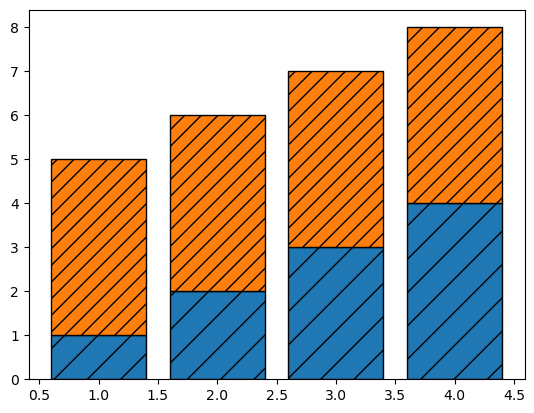

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

x = np.arange(1, 5)
y1 = np.arange(1, 5)
y2 = np.ones(y1.shape) * 4

fig = plt.figure()
axs = fig.subplot_mosaic([['bar1']])

axs['bar1'].bar(x, y1, edgecolor='black', hatch="/")
axs['bar1'].bar(x, y2, bottom=y1, edgecolor='black', hatch='//')
plt.show()